In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## Read in Data

In [4]:
T_nc = Dataset('tmp.0-10cm.mon.ltm.nc')
R_nc = Dataset('runof.sfc.mon.ltm.nc')
P_nc = Dataset('prate.sfc.mon.ltm.nc')
ls_nc = Dataset('lsmask.19294.nc')

In [5]:
T_nc.variables['tmp']

<class 'netCDF4._netCDF4.Variable'>
float32 tmp(time, lat, lon)
    long_name: Monthly Long Term Mean Temperature between 0-10 cm below ground level
    units: degK
    add_offset: 0.0
    scale_factor: 1.0
    missing_value: -9.96921e+36
    precision: 2
    least_significant_digit: 1
    GRIB_id: 11
    GRIB_name: TMP
    var_desc: Temperature
    level_desc: Between 0-10 cm BGL
    statistic: Long Term Mean
    parent_stat: Mean
    valid_range: [150. 400.]
    actual_range: [200.    312.512]
    dataset: NCEP Reanalysis Derived Products
unlimited dimensions: 
current shape = (12, 94, 192)
filling on, default _FillValue of 9.969209968386869e+36 used

In [6]:
P_nc.variables['prate']

<class 'netCDF4._netCDF4.Variable'>
float32 prate(time, lat, lon)
    long_name: Monthly Long Term Mean of Precipitation Rate
    valid_range: [-400.  700.]
    units: Kg/m^2/s
    add_offset: 0.0
    scale_factor: 1.0
    missing_value: -9.96921e+36
    precision: 1
    least_significant_digit: 0
    var_desc: Precipitation Rate
    level_desc: Surface
    statistic: Long Term Mean
    parent_stat: Mean
    actual_range: [9.320987e-08 2.932220e-04]
    dataset: NCEP Reanalysis Derived Products
unlimited dimensions: 
current shape = (12, 94, 192)
filling on, default _FillValue of 9.969209968386869e+36 used

-1 is land, and 0 is ocean.

In [7]:
ls_nc.variables['lsmask']

<class 'netCDF4._netCDF4.Variable'>
float32 lsmask(time, lat, lon)
    long_name: Surface land/sea mask
    valid_range: [-1.  1.]
    actual_range: [-1.  0.]
    units: none
    add_offset: 0.0
    scale_factor: 1.0
    missing_value: 32766
    precision: 2
    least_significant_digit: 1
    var_desc: Land/Sea Mask
    level_desc: Surface
    statistic: Individual Obs
    parent_stat: Other
    dataset: NCEP Reanalysis Derived Products
unlimited dimensions: 
current shape = (1, 94, 192)
filling on, default _FillValue of 9.969209968386869e+36 used

In [8]:
runoff = R_nc.variables['runof'][:]
runoff_mean = np.mean(runoff,axis=0)*24*3600  # all time average.

precip = P_nc.variables['prate'][:]
prate_mean = np.mean(precip,axis=0)  # all time average.
prate_mean_yr = np.mean(precip* 31536000 * 0.001,axis=0)  # all time average.

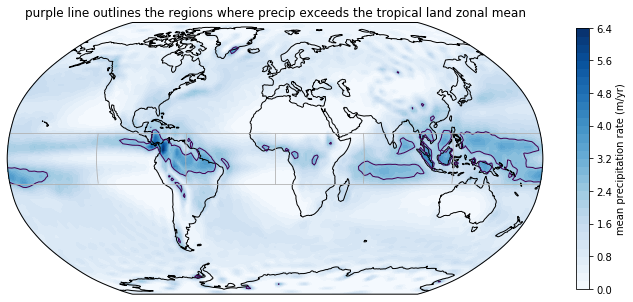

In [9]:
import cartopy.crs as ccrs

IM = np.shape(runoff_mean)[1]
JM = np.shape(runoff_mean)[0]

lon = np.linspace(0, 360, IM)
lat = np.linspace(-90, 90, JM)
        
lons, lats = np.meshgrid(lon, lat)  

plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.Robinson())

CS = plt.contourf(lons, -lats, prate_mean_yr,40,cmap='Blues',
             transform=ccrs.PlateCarree())
contour_line = plt.contour(lons, -lats, prate_mean_yr,[2.5,10000],
             transform=ccrs.PlateCarree(),linewidths=1)
ax.gridlines(ylocs=[-15,15])
cbar = plt.colorbar(CS,shrink=0.4)
cbar.set_label('mean precipitation rate (m/yr)')
ax.coastlines()
plt.title('purple line outlines the regions where precip exceeds the tropical land zonal mean')
plt.savefig('precip.pdf')
plt.show()


## Get Annual Zonal Means

In [10]:
T_zonal_means_nc = np.array([])
R_zonal_means_nc = np.array([])
P_zonal_means_nc = np.array([])
for i in range(len(T_nc.variables['lat'])):
    year_T = np.array([])
    year_R = np.array([])
    year_P = np.array([])
    for j in range(len(T_nc.variables['time'])):
        data_T = T_nc.variables['tmp'][j,i,:].data
        data_T = data_T[data_T>-100]
        data_R = R_nc.variables['runof'][j,i,:].data
        data_R = data_R[data_R>-100]
        data_P = P_nc.variables['prate'][j,i,:].data
        data_P = data_P[data_P>-100]
        year_T = np.append(year_T, data_T)
        year_R = np.append(year_R, data_R)
        year_P = np.append(year_P, data_P)
    T_zonal_means_nc = np.append(T_zonal_means_nc, np.nanmean(year_T))
    R_zonal_means_nc = np.append(R_zonal_means_nc, np.nanmean(year_R))
    P_zonal_means_nc = np.append(P_zonal_means_nc, np.nanmean(year_P))

In [11]:
P_zonal_means_nc

array([8.38934269e-06, 6.27646377e-06, 7.56858685e-06, 9.60317114e-06,
       7.13924807e-06, 8.39692297e-06, 9.30199089e-06, 8.87882929e-06,
       9.55121803e-06, 1.15853861e-05, 1.20196677e-05, 1.52997143e-05,
       2.09942072e-05, 2.12789123e-05, 2.21258042e-05, 2.64878171e-05,
       2.58421216e-05, 2.49034287e-05, 2.74206409e-05, 2.93037890e-05,
       2.79049758e-05, 2.71922258e-05, 2.65692751e-05, 2.55035252e-05,
       2.57430032e-05, 2.69271843e-05, 2.82963641e-05, 2.79177187e-05,
       2.67065227e-05, 2.63356197e-05, 2.39241262e-05, 2.24102570e-05,
       2.26244504e-05, 2.29489393e-05, 2.44944396e-05, 2.70876538e-05,
       2.88357106e-05, 3.09564812e-05, 3.47047390e-05, 4.01771515e-05,
       4.78906543e-05, 5.60765878e-05, 6.37915559e-05, 6.69386104e-05,
       6.31140558e-05, 5.59788194e-05, 5.30914404e-05, 5.10969369e-05,
       5.48818083e-05, 5.64411743e-05, 5.54689728e-05, 5.15844527e-05,
       4.85948016e-05, 4.44250925e-05, 3.92311504e-05, 3.35079870e-05,
      

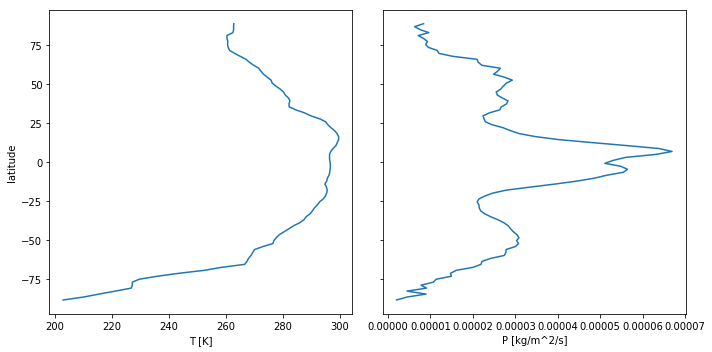

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,5))

ax[0].plot(T_zonal_means_nc,T_nc.variables['lat'])
ax[0].set_xlabel('T [K]')
ax[1].plot(P_zonal_means_nc,T_nc.variables['lat'])
ax[1].set_xlabel('P [kg/m^2/s]')

ax[0].set_ylabel('latitude')
plt.tight_layout()
plt.show(fig)

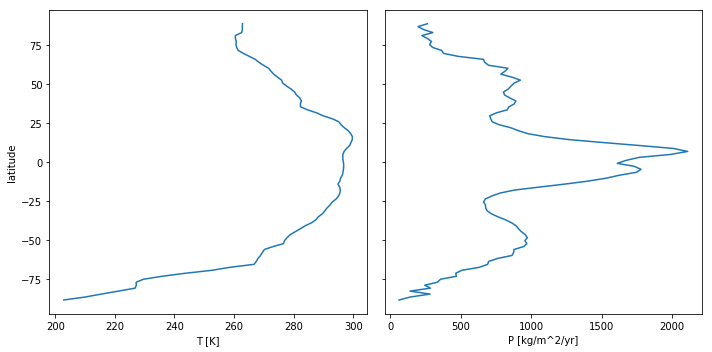

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,5))

ax[0].plot(T_zonal_means_nc,T_nc.variables['lat'])
ax[0].set_xlabel('T [K]')
ax[1].plot(P_zonal_means_nc*60*60*24*365,T_nc.variables['lat'])
ax[1].set_xlabel('P [kg/m^2/yr]')

ax[0].set_ylabel('latitude')
plt.tight_layout()
plt.show(fig)

Convert units to C and m/yr:

In [14]:
T_zonal_means = T_zonal_means_nc - 273.15
P_zonal_means = P_zonal_means_nc * 31536000 * 0.001

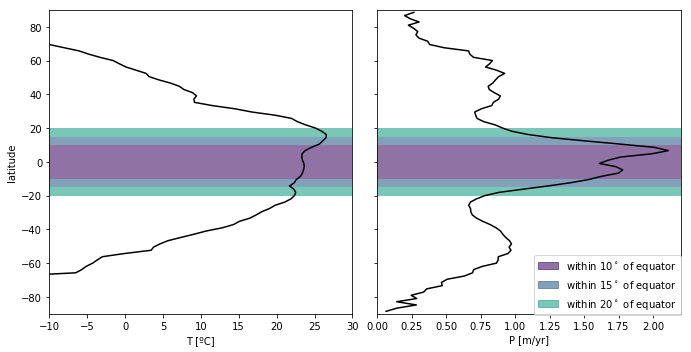

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,5))

degrees_10 = patches.Rectangle((-10,-10),40,20,edgecolor='none',alpha=0.6,facecolor='#481567')
degrees_15_low = patches.Rectangle((-10,-15),40,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_15_high = patches.Rectangle((-10,10),40,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_20_low = patches.Rectangle((-10,-20),40,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
degrees_20_high = patches.Rectangle((-10,15),40,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
ax[0].add_patch(degrees_10)
ax[0].add_patch(degrees_15_low)
ax[0].add_patch(degrees_15_high)
ax[0].add_patch(degrees_20_low)
ax[0].add_patch(degrees_20_high)
ax[0].plot(T_zonal_means,T_nc.variables['lat'],color='black')
ax[0].set_xlabel('T [ºC]')
ax[0].set_ylim([-90, 90])
ax[0].set_xlim([-10,30])


degrees_10 = patches.Rectangle((-10,-10),40,20,edgecolor='none',alpha=0.6,facecolor='#481567')
degrees_15_low = patches.Rectangle((-10,-15),40,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_15_high = patches.Rectangle((-10,10),40,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_20_low = patches.Rectangle((-10,-20),40,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
degrees_20_high = patches.Rectangle((-10,15),40,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
ax[1].add_patch(degrees_10)
ax[1].add_patch(degrees_15_low)
ax[1].add_patch(degrees_15_high)
ax[1].add_patch(degrees_20_low)
ax[1].add_patch(degrees_20_high)
ax[1].plot(P_zonal_means,T_nc.variables['lat'],color='black')
ax[1].set_xlabel('P [m/yr]')
ax[1].set_ylim([-90, 90])
ax[1].set_xlim([0, 2.2])
ax[0].set_ylabel('latitude')

degrees_10 = patches.Patch(linestyle='-', label='within 10$^\circ$ of equator',color='#481567',alpha=0.6)
degrees_15 = patches.Patch(label='within 15$^\circ$ of equator',color='#33638D',alpha=0.6)
degrees_20 = patches.Patch(label='within 20$^\circ$ of equator',color='#20A387',alpha=0.6)
plt.legend(ncol=1,bbox_to_anchor=(0.5, -.02),handles=[degrees_10,degrees_15,degrees_20],loc='lower left')

plt.tight_layout()
plt.show(fig)

## Land Data Only

Note that T and R data is already over land only, except it includes seasonally variable ice sheets:

In [16]:
Tland_zonal_means_nc = np.array([])
Rland_zonal_means_nc = np.array([])
Pland_zonal_means_nc = np.array([])
for i in range(len(T_nc.variables['lat'])):
    year_T = np.array([])
    year_R = np.array([])
    year_P = np.array([])
    for j in range(len(T_nc.variables['time'])):
        data_T = T_nc.variables['tmp'][j,i,:].data[ls_nc.variables['lsmask'][0,i,:].data==-1]
        data_T = data_T[data_T>-100]
        data_R = R_nc.variables['runof'][j,i,:].data[ls_nc.variables['lsmask'][0,i,:].data==-1]
        data_R = data_R[data_R>-100]
        data_P = P_nc.variables['prate'][j,i,:].data[ls_nc.variables['lsmask'][0,i,:].data==-1]
        data_P = data_P[data_P>-100]
        year_T = np.append(year_T, data_T)
        year_R = np.append(year_R, data_R)
        year_P = np.append(year_P, data_P)
    Tland_zonal_means_nc = np.append(Tland_zonal_means_nc, np.nanmean(year_T))
    Rland_zonal_means_nc = np.append(Rland_zonal_means_nc, np.nanmean(year_R))
    Pland_zonal_means_nc = np.append(Pland_zonal_means_nc, np.nanmean(year_P))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice


In [17]:
Tland_zonal_means = Tland_zonal_means_nc - 273.15
Pland_zonal_means = Pland_zonal_means_nc * 31536000 * 0.001

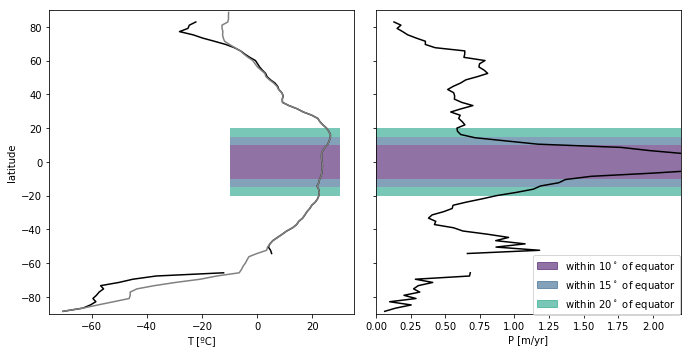

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,5))

degrees_10 = patches.Rectangle((-10,-10),40,20,edgecolor='none',alpha=0.6,facecolor='#481567')
degrees_15_low = patches.Rectangle((-10,-15),40,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_15_high = patches.Rectangle((-10,10),40,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_20_low = patches.Rectangle((-10,-20),40,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
degrees_20_high = patches.Rectangle((-10,15),40,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
ax[0].add_patch(degrees_10)
ax[0].add_patch(degrees_15_low)
ax[0].add_patch(degrees_15_high)
ax[0].add_patch(degrees_20_low)
ax[0].add_patch(degrees_20_high)
ax[0].plot(Tland_zonal_means,T_nc.variables['lat'],color='black')
ax[0].plot(T_zonal_means,T_nc.variables['lat'],color='grey')
ax[0].set_xlabel('T [ºC]')
ax[0].set_ylim([-90, 90])
#ax[0].set_xlim([-30,30])


degrees_10 = patches.Rectangle((-10,-10),40,20,edgecolor='none',alpha=0.6,facecolor='#481567')
degrees_15_low = patches.Rectangle((-10,-15),40,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_15_high = patches.Rectangle((-10,10),40,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_20_low = patches.Rectangle((-10,-20),40,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
degrees_20_high = patches.Rectangle((-10,15),40,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
ax[1].add_patch(degrees_10)
ax[1].add_patch(degrees_15_low)
ax[1].add_patch(degrees_15_high)
ax[1].add_patch(degrees_20_low)
ax[1].add_patch(degrees_20_high)
ax[1].plot(Pland_zonal_means,T_nc.variables['lat'],color='black')
ax[1].set_xlabel('P [m/yr]')
ax[1].set_ylim([-90, 90])
ax[1].set_xlim([0, 2.2])
ax[0].set_ylabel('latitude')

degrees_10 = patches.Patch(linestyle='-', label='within 10$^\circ$ of equator',color='#481567',alpha=0.6)
degrees_15 = patches.Patch(label='within 15$^\circ$ of equator',color='#33638D',alpha=0.6)
degrees_20 = patches.Patch(label='within 20$^\circ$ of equator',color='#20A387',alpha=0.6)
plt.legend(ncol=1,bbox_to_anchor=(0.5, -.02),handles=[degrees_10,degrees_15,degrees_20],loc='lower left')

plt.tight_layout()

plt.show(fig)

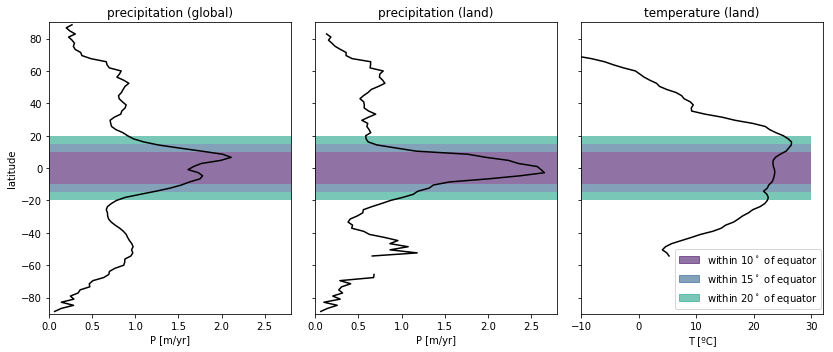

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12,5))

degrees_10 = patches.Rectangle((-10,-10),40,20,edgecolor='none',alpha=0.6,facecolor='#481567')
degrees_15_low = patches.Rectangle((-10,-15),40,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_15_high = patches.Rectangle((-10,10),40,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_20_low = patches.Rectangle((-10,-20),40,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
degrees_20_high = patches.Rectangle((-10,15),40,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
ax[0].add_patch(degrees_10)
ax[0].add_patch(degrees_15_low)
ax[0].add_patch(degrees_15_high)
ax[0].add_patch(degrees_20_low)
ax[0].add_patch(degrees_20_high)
ax[0].plot(P_zonal_means,T_nc.variables['lat'],color='black')
ax[0].set_xlabel('P [m/yr]')
ax[0].set_ylim([-90, 90])
ax[0].set_xlim([0, 2.8])
ax[0].set_ylabel('latitude')
ax[0].set_title('precipitation (global)')

degrees_10 = patches.Rectangle((-10,-10),40,20,edgecolor='none',alpha=0.6,facecolor='#481567')
degrees_15_low = patches.Rectangle((-10,-15),40,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_15_high = patches.Rectangle((-10,10),40,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_20_low = patches.Rectangle((-10,-20),40,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
degrees_20_high = patches.Rectangle((-10,15),40,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
ax[1].add_patch(degrees_10)
ax[1].add_patch(degrees_15_low)
ax[1].add_patch(degrees_15_high)
ax[1].add_patch(degrees_20_low)
ax[1].add_patch(degrees_20_high)
ax[1].plot(Pland_zonal_means,T_nc.variables['lat'],color='black')
ax[1].set_xlabel('P [m/yr]')
ax[1].set_ylim([-90, 90])
ax[1].set_xlim([0, 2.8])
ax[1].set_title('precipitation (land)')

degrees_10 = patches.Rectangle((-10,-10),40,20,edgecolor='none',alpha=0.6,facecolor='#481567')
degrees_15_low = patches.Rectangle((-10,-15),40,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_15_high = patches.Rectangle((-10,10),40,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_20_low = patches.Rectangle((-10,-20),40,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
degrees_20_high = patches.Rectangle((-10,15),40,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
ax[2].add_patch(degrees_10)
ax[2].add_patch(degrees_15_low)
ax[2].add_patch(degrees_15_high)
ax[2].add_patch(degrees_20_low)
ax[2].add_patch(degrees_20_high)
ax[2].plot(Tland_zonal_means,T_nc.variables['lat'],color='black')
ax[2].set_xlabel('T [ºC]')
ax[2].set_ylim([-90, 90])
ax[2].set_xlim([-10,32])
ax[2].set_title('temperature (land)')

degrees_10 = patches.Patch(linestyle='-', label='within 10$^\circ$ of equator',color='#481567',alpha=0.6)
degrees_15 = patches.Patch(label='within 15$^\circ$ of equator',color='#33638D',alpha=0.6)
degrees_20 = patches.Patch(label='within 20$^\circ$ of equator',color='#20A387',alpha=0.6)
plt.legend(ncol=1,bbox_to_anchor=(0.365, 0),handles=[degrees_10,degrees_15,degrees_20],loc='lower left')

plt.tight_layout()
plt.savefig('../../code_output/climate_data.png')
plt.savefig('../../code_output/climate_data.pdf')
plt.show(fig)

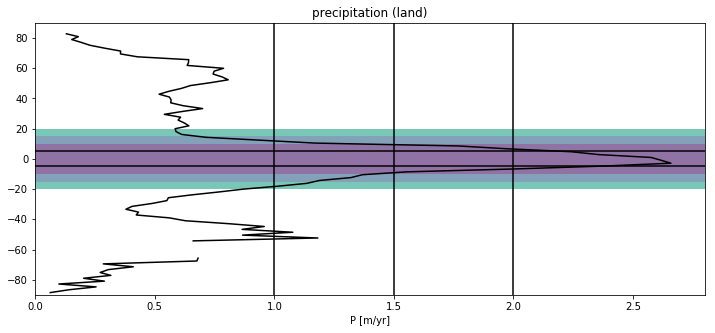

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))

degrees_10 = patches.Rectangle((-10,-10),40,20,edgecolor='none',alpha=0.6,facecolor='#481567')
degrees_15_low = patches.Rectangle((-10,-15),40,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_15_high = patches.Rectangle((-10,10),40,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_20_low = patches.Rectangle((-10,-20),40,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
degrees_20_high = patches.Rectangle((-10,15),40,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
ax.add_patch(degrees_10)
ax.add_patch(degrees_15_low)
ax.add_patch(degrees_15_high)
ax.add_patch(degrees_20_low)
ax.add_patch(degrees_20_high)
ax.plot(Pland_zonal_means,T_nc.variables['lat'],color='black')
ax.set_xlabel('P [m/yr]')
ax.set_ylim([-90, 90])
ax.set_xlim([0, 2.8])
ax.set_title('precipitation (land)')
plt.vlines(1,-90,90)
plt.vlines(1.5,-90,90)
plt.vlines(2,-90,90)
plt.hlines(-5,0,2.8)
plt.hlines(5,0,2.8)